## Importing Required Python Libraries for Data Analysis and PCA

In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## Loading and Displaying the Cleaned Premier League Dataset

The data is loaded from the cleaned CSV file `cleaned-premier-label.csv` and displayed to get an overview of its contents.


In [55]:
df = pd.read_csv('../data/cleaned-premier-label.csv')
df

,date,season,home_team,away_team,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far,away_season_wins_so_far,away_season_draws_so_far,away_season_losses_so_far
0,2015-08-08,2015/2016,Bournemouth,Aston Villa,0,7.024,3.303,3.748,20,17,0,0,0,0,0,0,0,0
1,2015-08-08,2015/2016,Chelsea,Swansea,1,6.697,4.338,8.967,1,8,0,0,0,0,0,0,0,0
2,2015-08-08,2015/2016,Everton,Watford,1,6.842,3.514,4.852,11,18,0,0,0,0,0,0,0,0
3,2015-08-08,2015/2016,Leicester,Sunderland,2,7.000,3.207,3.742,14,16,0,0,0,0,0,0,0,0
4,2015-08-08,2015/2016,Man United,Tottenham,2,6.477,3.651,5.318,4,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2019-05-12,2018/2019,Liverpool,Wolves,2,6.619,8.266,8.563,4,19,1,1,17,2,0,15,10,10
1242,2019-05-12,2018/2019,Man United,Cardiff,0,6.563,8.631,8.438,2,20,0,-1,17,8,9,7,5,18
1243,2019-05-12,2018/2019,Southampton,Huddersfield,1,6.204,7.470,6.521,17,16,-1,0,9,10,14,3,4,21
1244,2019-05-12,2018/2019,Tottenham,Everton,1,6.153,6.795,3.233,3,8,-1,1,20,2,11,14,8,13


## Checking the Shape of the Dataset

Using `df.shape` to view the number of rows and columns in the dataset.


In [56]:
df.shape


(1246, 18)

## Dataset Information Overview

The `df.info()` method provides a concise summary of the dataset, including the number of non-null values, data types of each column, and overall structure.


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       1246 non-null   object 
 1   season                     1246 non-null   object 
 2   home_team                  1246 non-null   object 
 3   away_team                  1246 non-null   object 
 4   home_outcome               1246 non-null   int64  
 5   avg_odd_home_win           1246 non-null   float64
 6   avg_odd_draw               1246 non-null   float64
 7   avg_odd_away_win           1246 non-null   float64
 8   home_ranking               1246 non-null   int64  
 9   away_ranking               1246 non-null   int64  
 10  last_home_result           1246 non-null   int64  
 11  last_away_result           1246 non-null   int64  
 12  home_season_wins_so_far    1246 non-null   int64  
 13  home_season_draws_so_far   1246 non-null   int64

## Statistical Summary of Numerical Features

The `df.describe()` method generates descriptive statistics of the dataset's numerical columns, such as mean, standard deviation, min, max, and quartiles.

In [58]:
df.describe()

,home_outcome,avg_odd_home_win,avg_odd_draw,avg_odd_away_win,home_ranking,away_ranking,last_home_result,last_away_result,home_season_wins_so_far,home_season_draws_so_far,home_season_losses_so_far,away_season_wins_so_far,away_season_draws_so_far,away_season_losses_so_far
count,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000,1246.000000
mean,1.133226,7.274838,4.441469,3.684693,11.114767,10.455056,-0.089888,0.072231,5.401284,4.509631,5.774478,5.521669,4.478331,5.555377
std,0.851120,1.043937,1.647506,1.604586,5.542866,5.681293,0.851143,0.860326,4.181174,2.974238,4.374224,4.220710,3.025848,4.431330
min,0.000000,5.463000,2.935000,2.005000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.492000,3.250000,2.544750,7.000000,6.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,7.056000,3.535000,3.197000,11.000000,10.000000,0.000000,0.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
75%,2.000000,7.885250,6.383250,4.292000,16.000000,15.000000,1.000000,1.000000,8.000000,6.000000,9.000000,8.000000,6.000000,9.000000
max,2.000000,10.355000,9.088000,9.057000,20.000000,20.000000,1.000000,1.000000,20.000000,15.000000,21.000000,20.000000,15.000000,21.000000


## Calculating the Mean of All Numerical Columns

The `df.mean(numeric_only=True)` function computes the mean (average) value for each numerical column in the dataset.

In [59]:
# Finding the mean of all columns
column_means = df.mean(numeric_only=True)
print(column_means)

home_outcome                  1.133226
avg_odd_home_win              7.274838
avg_odd_draw                  4.441469
avg_odd_away_win              3.684693
home_ranking                 11.114767
away_ranking                 10.455056
last_home_result             -0.089888
last_away_result              0.072231
home_season_wins_so_far       5.401284
home_season_draws_so_far      4.509631
home_season_losses_so_far     5.774478
away_season_wins_so_far       5.521669
away_season_draws_so_far      4.478331
away_season_losses_so_far     5.555377
dtype: float64


## Calculating the Median of All Numerical Columns

The `df.median(numeric_only=True)` function calculates the median value for each numerical column in the dataset, providing insight into the central tendency of the data.


In [60]:
# Finding the median of all columns
column_medians = df.median(numeric_only=True)
print(column_medians)

home_outcome                  1.000
avg_odd_home_win              7.056
avg_odd_draw                  3.535
avg_odd_away_win              3.197
home_ranking                 11.000
away_ranking                 10.000
last_home_result              0.000
last_away_result              0.000
home_season_wins_so_far       5.000
home_season_draws_so_far      4.000
home_season_losses_so_far     5.000
away_season_wins_so_far       5.000
away_season_draws_so_far      4.000
away_season_losses_so_far     5.000
dtype: float64


## Calculating the Mode of Each Column

The `df.mode()` function returns the most frequent value(s) for each column.  
If multiple modes exist, `iloc[0]` selects the first one for each column.


In [61]:
# Calculate the mode (most frequent value) for each column and select the first mode in case of multiple
single_mode = df.mode().iloc[0]
print(single_mode)

date                         2015-12-26
season                        2015/2016
home_team                       Everton
away_team                       Everton
home_outcome                        2.0
avg_odd_home_win                  6.515
avg_odd_draw                      3.172
avg_odd_away_win                  2.085
home_ranking                       11.0
away_ranking                        6.0
last_home_result                   -1.0
last_away_result                    1.0
home_season_wins_so_far             0.0
home_season_draws_so_far            1.0
home_season_losses_so_far           0.0
away_season_wins_so_far             0.0
away_season_draws_so_far            1.0
away_season_losses_so_far           0.0
Name: 0, dtype: object


## Histogram and KDE Plot for Betting Odds

For each of the numerical columns related to betting odds (`avg_odd_home_win`, `avg_odd_draw`, and `avg_odd_away_win`), a histogram with a Kernel Density Estimate (KDE) is plotted.  
These visualizations help in understanding the distribution and spread of betting odds in the dataset.


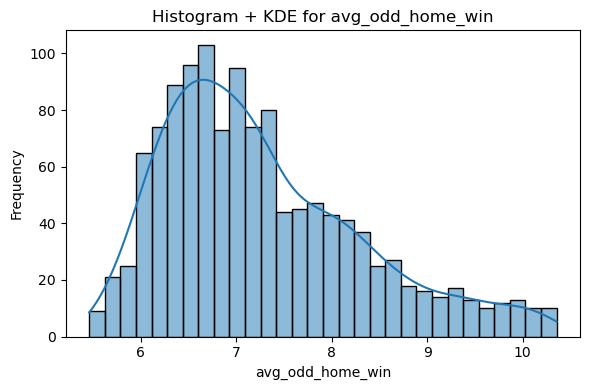

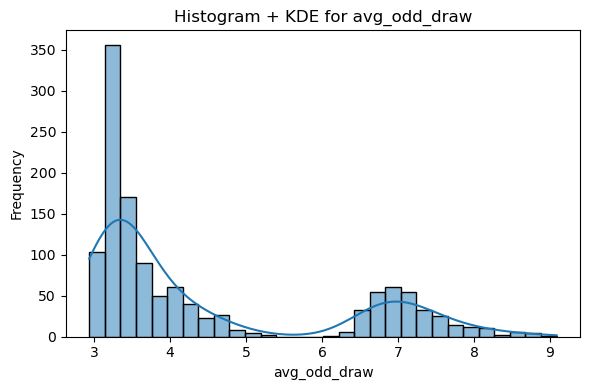

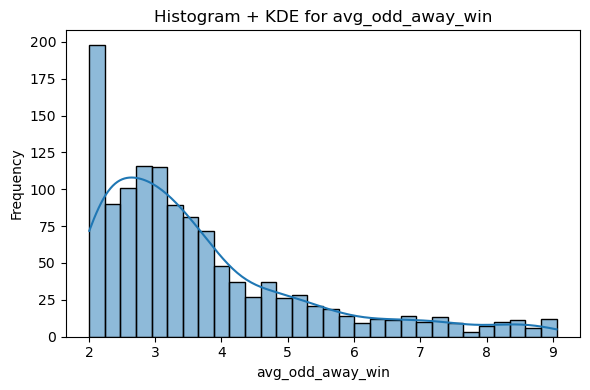

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolonner der kan bruges til KDE + histogram (numeriske)
numerical_cols = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']

for column in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram + KDE for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


### Interpretation of the Histograms with KDE for Betting Odds

Each plot displays the distribution of a specific betting odd type:

- **Home Win Odds (`avg_odd_home_win`)**:  
  The histogram shows the frequency of average odds for home team victories. Most values are concentrated between roughly 1.5 and 2.5, indicating that home teams are often favored to win, but not overwhelmingly.

- **Draw Odds (`avg_odd_draw`)**:  
  This distribution is generally more centered, often peaking around 3.0. This reflects that draws are considered moderately likely but less frequent than home wins, according to the betting markets.

- **Away Win Odds (`avg_odd_away_win`)**:  
  These odds tend to be higher, often peaking above 3.0 and stretching further. This indicates that away teams are usually considered underdogs, and higher odds are offered for away victories.

The KDE (Kernel Density Estimate) line over each histogram smooths out the distribution, making it easier to observe the central tendency and skewness of each odds type:
- If the KDE is skewed to the right (long tail to the right), higher odds occur less frequently.
- If it's more symmetric, the outcomes are more evenly distributed.

## Correlation Heatmap of Numerical Features

Shows the correlation between numerical variables in the dataset.

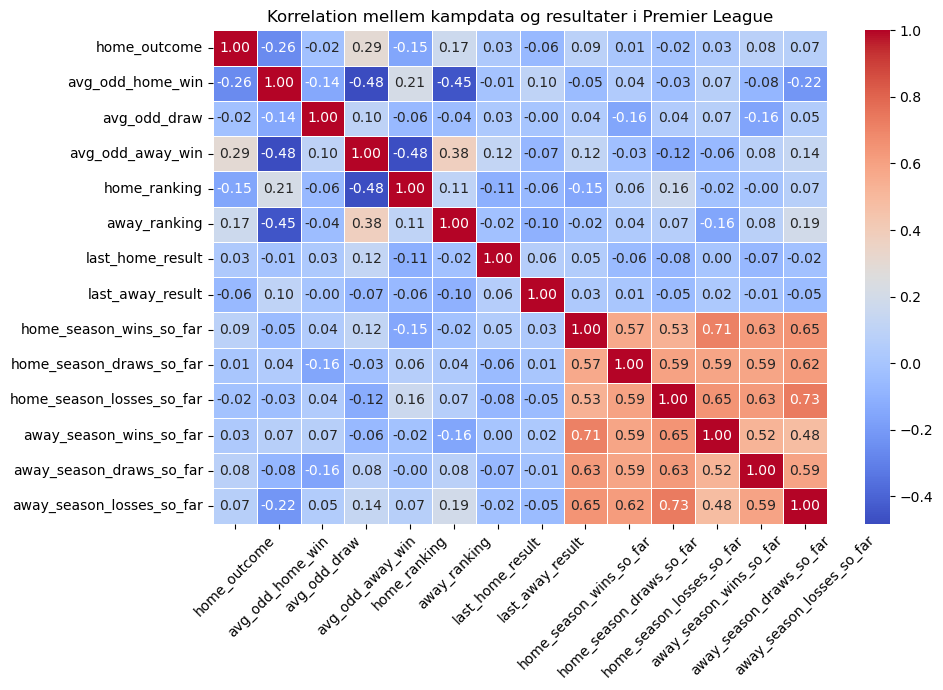

In [63]:
# Re-define df_new due to previous kernel reset
df_new = pd.read_csv('../data/cleaned-premier-label.csv')

# Keep only numerical columns
only_numerical_df = df_new.select_dtypes(include='number')

# Calculate correlation matrix
corr = only_numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korrelation mellem kampdata og resultater i Premier League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Key Insights from the Correlation Heatmap

#### 1. **Odds Reflect Match Outcomes**
- **`home_outcome` is negatively correlated with `avg_odd_home_win` (-0.26)** and positively with `avg_odd_away_win` (0.29).
  - This means that when the odds for a home win are low (home team is favored), the home team tends to win more often — which aligns with typical betting logic.

#### 2. **Home and Away Odds Are Strongly Linked**
- **`avg_odd_home_win` and `avg_odd_away_win` show a strong negative correlation (-0.48)**:
  - If the home team is strongly favored (low odds), the away team is considered less likely to win (high odds), and vice versa.

#### 3. **Cumulative Match Statistics Are Interrelated**
- There are strong positive correlations between:
  - `home_total_wins_so_far`, `home_total_draws_so_far`, and `home_total_losses_so_far` (0.53–0.71),
  - The same applies to the away team's stats.
  - This makes sense, as all results accumulate over the season — more matches played means more of each result type.

#### 4. **Stronger Teams Reduce Opponent Odds**
- **`home_ranking` is negatively correlated with `avg_odd_away_win` (-0.48)**:
  - A lower ranking number (i.e., a higher-ranked team) correlates with lower chances for the away team to win, hence higher away win odds.


## Applying PCA on Numerical Data

PCA (Principal Component Analysis) is performed on all numerical columns to reduce dimensionality and explore variance structure.


In [64]:
# Keep only numeric columns for PCA
numeric_df = df.select_dtypes(include='number')

# Fit PCA on numeric data
pca = PCA()
pca_data = pca.fit_transform(numeric_df)

pca_data

array([[-11.83963093,  11.30243077,   2.95898089, ...,  -0.55645892,
         -0.34015382,  -1.00157678],
       [-13.2994667 ,  -6.57276108,  -7.5599898 , ...,  -1.01835748,
         -1.10996872,  -0.30031111],
       [-12.17036795,   6.8590807 ,  -4.77435128, ...,  -0.28497421,
         -0.21852726,  -0.1949595 ],
       ...,
       [ 13.95557492,   9.55442142,  -0.03209336, ...,  -0.41224195,
         -1.35123694,   0.10722445],
       [ 15.79722094,  -9.52182324,  -5.72583793, ...,   0.72290878,
         -1.10988141,  -0.60654112],
       [ 16.12095658,   2.70841825,   0.84469097, ...,   0.38535723,
         -1.12703748,  -1.09720869]])

## Explained Variance Ratio of Principal Components

Displays the proportion of total variance explained by each principal component.  
This helps determine how many components are needed to capture most of the information in the dataset.


In [65]:
# The PCA class contains explained variance  ratio, 
# which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.38638858, 0.22479867, 0.18577114, 0.0527418 , 0.04240142,
       0.03247324, 0.02475137, 0.01439005, 0.01261396, 0.00737158,
       0.00471373, 0.00409406, 0.0039991 , 0.00349129])

## Scree Plot of Principal Component Variance

A scree plot showing how much variance each principal component explains.  
This visualization helps identify the "elbow point" — the optimal number of components to retain for dimensionality reduction.


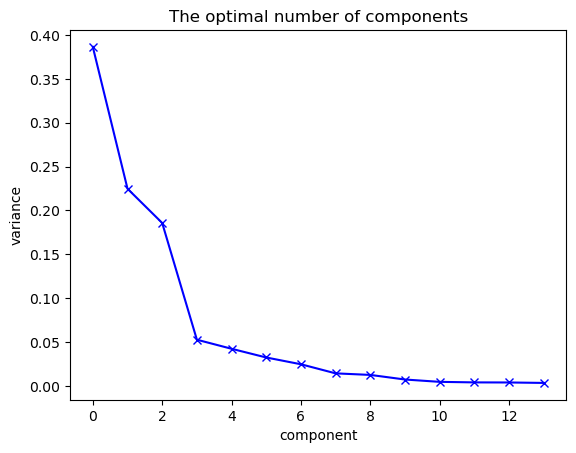

In [66]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

### Interpretation of the Scree Plot

The scree plot visualizes the explained variance of each principal component. Key observations:

- **The first component explains ~39%** of the total variance — the most informative.
- **The second and third components explain ~22% and ~19%**, respectively.
- After the third component, the explained variance drops significantly, indicating diminishing returns.

The "elbow point" occurs around **component 3**, suggesting that **the first 3 components capture most of the meaningful variance** in the data. 

## Cumulative Explained Variance

This plot shows how the total explained variance accumulates as more principal components are added.  
It helps determine the number of components needed to retain a desired amount of total variance (e.g., 90%).


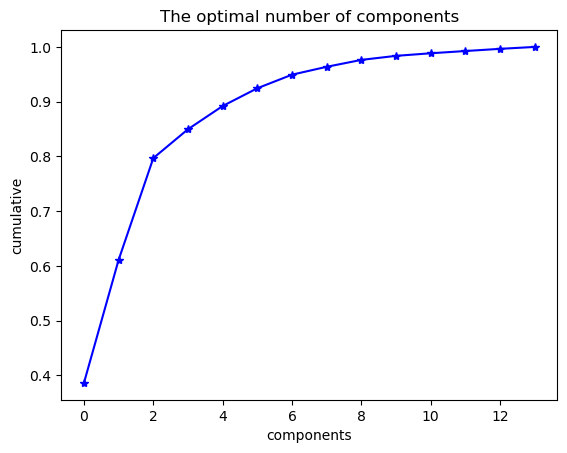

In [67]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

### Interpretation of the Cumulative Explained Variance Plot

This plot shows how much of the total variance is captured as more principal components are added.

#### Key Observations:
- The **first 3 components explain over 80%** of the total variance.
- With **5 components**, the cumulative explained variance exceeds **90%**.
- After that, the curve flattens, meaning additional components add minimal new information.

#### Conclusion:
Selecting the **first 3 to 5 components** is likely sufficient to retain most of the information in the data while reducing dimensionality significantly.


## Boxplots of Betting Odds

Displays individual boxplots for home win, draw, and away win odds.  
Boxplots help identify the distribution, central values, and potential outliers for each odds type.


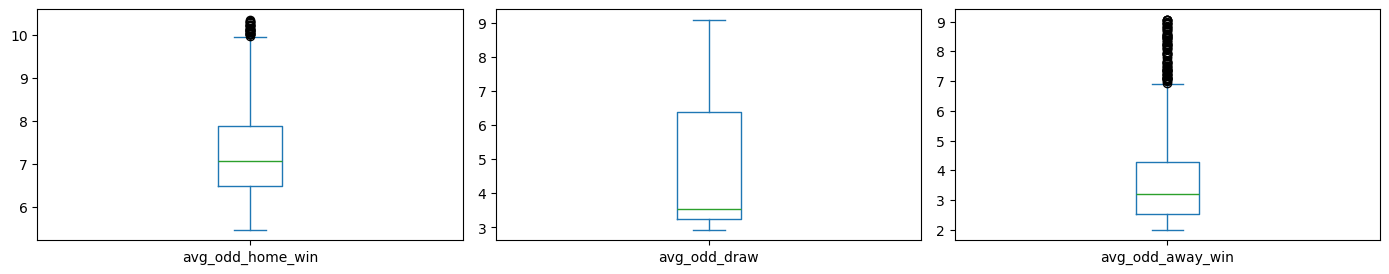

In [68]:
# Udvælg de ønskede kolonner
columns_to_plot = ['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win'
]

# Lav boxplots med subplots
df[columns_to_plot].plot(
    kind='box',
    subplots=True,
    layout=(3, 3),  # 3x3 grid for at få god plads
    sharex=False,
    sharey=False,
    figsize=(14, 8),
    whis=1.5
)

plt.tight_layout()
plt.show()


### Interpretation of Boxplots for Betting Odds

The boxplots show the distribution of average betting odds for home wins, draws, and away wins:

- **`avg_odd_home_win`**:
  - The median is around 6.8.
  - There are several **outliers above 10**, indicating rare matches where the home team was a strong underdog.
  - The interquartile range is relatively wide, showing moderate variability.

- **`avg_odd_draw`**:
  - A more **symmetric and centered** distribution with a median around 3.5.
  - Less variation and fewer outliers compared to the other odds types.

- **`avg_odd_away_win`**:
  - Lower median (~3.0), but a high number of **outliers above 7**, suggesting that away teams are often considered underdogs.
  - The distribution is **right-skewed**, indicating more high-value odds.

#### Summary:
- **Draw odds** are the most stable and predictable.
- **Away win odds** have the most extreme values (outliers).
- These **outliers** may be worth further investigation, as they could indicate surprising or unusual match outcomes.


In [69]:
#use one-hot encoding for categorical variables
df = pd.read_csv('../data/cleaned-premier-onehot.csv')

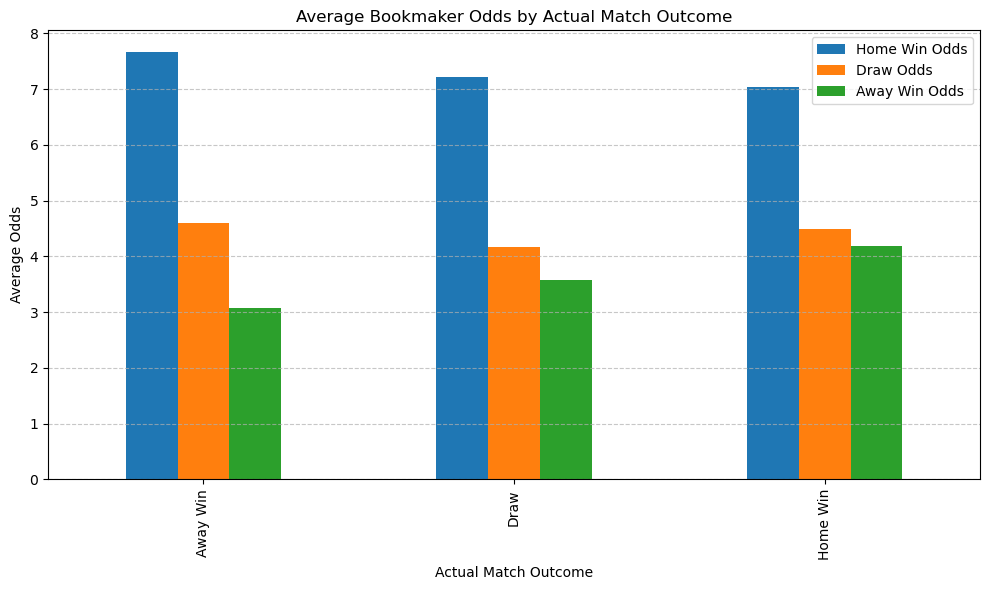

In [70]:
def label_outcome(row):
    if row['home_outcome_W'] == 1:
        return 'Home Win'
    elif row['home_outcome_D'] == 1:
        return 'Draw'
    else:
        return 'Away Win'

df['actual_result'] = df.apply(label_outcome, axis=1)

odds_by_outcome = df.groupby('actual_result')[['avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win']].mean()

odds_by_outcome.plot(kind='bar', figsize=(10, 6))

plt.title("Average Bookmaker Odds by Actual Match Outcome")
plt.ylabel("Average Odds")
plt.xlabel("Actual Match Outcome")
plt.legend(["Home Win Odds", "Draw Odds", "Away Win Odds"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Shows the average bookmaker odds for each possible outcome, in matches that ended in a home win, draw, or away win.

## Odds vs Reality

This highlights a strange pattern in our dataset:  
Even though home teams, on average, are more likely to win, this is not reflected in the odds data.

The fact that bookmakers almost never favor the home team suggests there may be an underlying issue or bias in the dataset.

It could also reflect how gamblers tend to bet, if the betting market disproportionately favors away teams or draws, bookmakers might adjust odds accordingly to balance their risk.  
This market-driven skew could explain why the odds don't align with the actual win rates of home teams.

Either way, this discrepancy may indicate noise or bias in the data that could affect model performance.

In [71]:
def favored_outcome(row):
    odds = {
        'Home Win': row['avg_odd_home_win'],
        'Draw': row['avg_odd_draw'],
        'Away Win': row['avg_odd_away_win']
    }
    return min(odds, key=odds.get)

df['bookmaker_favored'] = df.apply(favored_outcome, axis=1)

favored_counts = df['bookmaker_favored'].value_counts(normalize=True) * 100
print("How often each outcome was favored by the odds (lowest odds):")
print(favored_counts.round(2))

How often each outcome was favored by the odds (lowest odds):
bookmaker_favored
Away Win    59.23
Draw        38.44
Home Win     2.33
Name: proportion, dtype: float64


In [72]:
actual_outcomes = df[['home_outcome_W', 'home_outcome_D', 'home_outcome_L']].sum()
actual_outcomes.index = ['Home Win', 'Draw', 'Away Win']
actual_outcomes_percent = actual_outcomes / actual_outcomes.sum() * 100

print("\nActual outcome distribution:")
print(actual_outcomes_percent.round(2))


Actual outcome distribution:
Home Win    43.74
Draw        25.84
Away Win    30.42
dtype: float64


In [73]:
df['ranking_diff'] = df['away_ranking'] - df['home_ranking']

avg_diff_when_away_favored = df[df['bookmaker_favored'] == 'Away Win']['ranking_diff'].mean()
print(f"\nAverage ranking_diff when Away Win is favored: {avg_diff_when_away_favored:.2f}") 


Average ranking_diff when Away Win is favored: -3.79


Bookmakers systematically favor away teams
Despite home teams winning more often, bookmakers set away win odds lower in 59% of all matches, while home teams are only favored in 2%.

even though home teams wins 13.32% more often

# Research Questions 1

## How do bookmaker odds correlate with actual match outcomes?

In [74]:
# Calculate correlation of odds with their respective outcomes
home_win_corr = df['avg_odd_home_win'].corr(df['home_outcome_W'])
draw_corr = df['avg_odd_draw'].corr(df['home_outcome_D'])
away_win_corr = df['avg_odd_away_win'].corr(df['home_outcome_L'])

print("Correlation between specific odds and corresponding outcomes:")
print(f"Home win odds vs actual home wins:   {home_win_corr:.3f}")
print(f"Draw odds vs actual draws:           {draw_corr:.3f}")
print(f"Away win odds vs actual away wins:   {away_win_corr:.3f}")


Correlation between specific odds and corresponding outcomes:
Home win odds vs actual home wins:   -0.208
Draw odds vs actual draws:           -0.095
Away win odds vs actual away wins:   -0.253


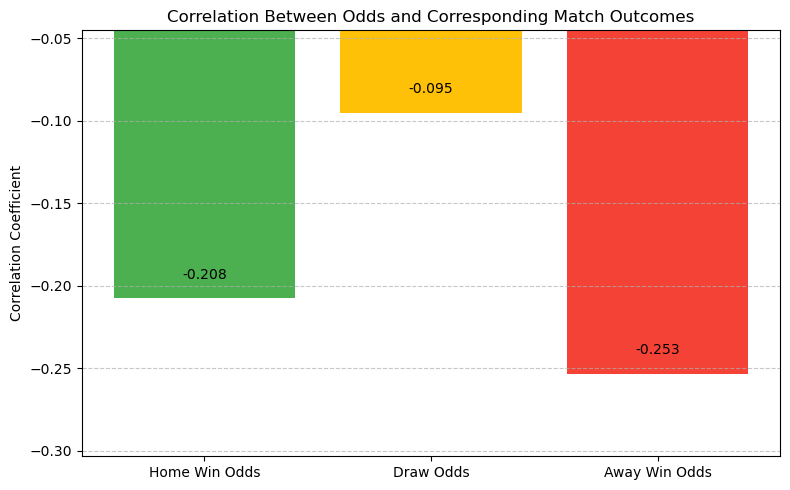

In [75]:
labels = ['Home Win Odds', 'Draw Odds', 'Away Win Odds']
correlations = [
    df['avg_odd_home_win'].corr(df['home_outcome_W']),
    df['avg_odd_draw'].corr(df['home_outcome_D']),
    df['avg_odd_away_win'].corr(df['home_outcome_L'])
]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, correlations, color=['#4CAF50', '#FFC107', '#F44336'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom')

plt.title("Correlation Between Odds and Corresponding Match Outcomes")
plt.ylabel("Correlation Coefficient")
plt.ylim(min(correlations) - 0.05, max(correlations) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Home Win Odds

A correlation of -0.208 means that as home win odds decrease (i.e., the home team is more favored), the likelihood of a home win increases.

This is expected and shows that bookmaker odds have some predictive value for home wins.

---

### Away Win Odds

A correlation of -0.253 is slightly stronger, but otherwise shows the same pattern as home win odds: lower odds → higher likelihood of that outcome.

Although it's slightly surprising that away win odds, on average, perform better, since home teams are generally favored, we might have expected home odds to be more predictive.

---

### Draw Odds

A correlation of -0.095 is very weak, suggesting that draw odds are poor predictors of actual draws.

---

### Conclusion

Bookmaker odds do reflect actual match outcomes to some extent, especially for wins and losses.

However, the predictive strength is moderate at best, and draw prediction remains weak.


# Research Questions 2

## Does a higher ranking from the previous season increase the likelihood of winning?

In [76]:
# Correlation: Does a better home ranking increase home win chances?
home_corr = df['home_ranking'].corr(df['home_outcome_W'])
away_corr = df['away_ranking'].corr(df['home_outcome_W'])

print("Correlation between last season's rankings and home wins:")
print(f"Home ranking vs home win:  {home_corr:.2f}")
print(f"Away ranking vs home win:  {-away_corr:.2f}  # flipped to represent 'weaker away team'")

# Average ranking per outcome
print("\nAverage team rankings per outcome:")
print("When home team wins:")
print("Home ranking:", round(df[df['home_outcome_W'] == 1]['home_ranking'].mean(), 2))
print("Away ranking:", round(df[df['home_outcome_W'] == 1]['away_ranking'].mean(), 2))

print("\nWhen match is a draw:")
print("Home ranking:", round(df[df['home_outcome_D'] == 1]['home_ranking'].mean(), 2))
print("Away ranking:", round(df[df['home_outcome_D'] == 1]['away_ranking'].mean(), 2))

print("\nWhen away team wins:")
print("Home ranking:", round(df[df['home_outcome_L'] == 1]['home_ranking'].mean(), 2))
print("Away ranking:", round(df[df['home_outcome_L'] == 1]['away_ranking'].mean(), 2))


Correlation between last season's rankings and home wins:
Home ranking vs home win:  -0.13
Away ranking vs home win:  -0.14  # flipped to represent 'weaker away team'

Average team rankings per outcome:
When home team wins:
Home ranking: 10.29
Away ranking: 11.38

When match is a draw:
Home ranking: 11.1
Away ranking: 10.5

When away team wins:
Home ranking: 12.31
Away ranking: 9.08


### Analysis of Team Rankings and Match Outcomes

These values suggest a small but consistent trend:

Better-ranked teams (from last season) are more likely to win, but ranking alone is not a strong predictor.

In matches where the home team won, they were on average better ranked than their opponent.

In away wins, the away team had a significantly better ranking than the home team.

Draws tend to occur when teams are closely matched in ranking.

### Conclusion

While previous season rankings do influence match outcomes, the effect is relatively weak on its own.


In [77]:
df['ranking_diff'] = df['away_ranking'] - df['home_ranking']

# Bin the ranking difference into intervals
df['ranking_diff_bin'] = pd.cut(df['ranking_diff'], bins=[-20, -10, -5, 0, 5, 10, 20])

bin_stats = df.groupby('ranking_diff_bin', observed=False)[['home_outcome_L', 'home_outcome_D', 'home_outcome_W']].mean().reset_index()

# Rename for clarity
bin_stats.columns = ['ranking_diff_bin', 'away_win_rate', 'draw_rate', 'home_win_rate']


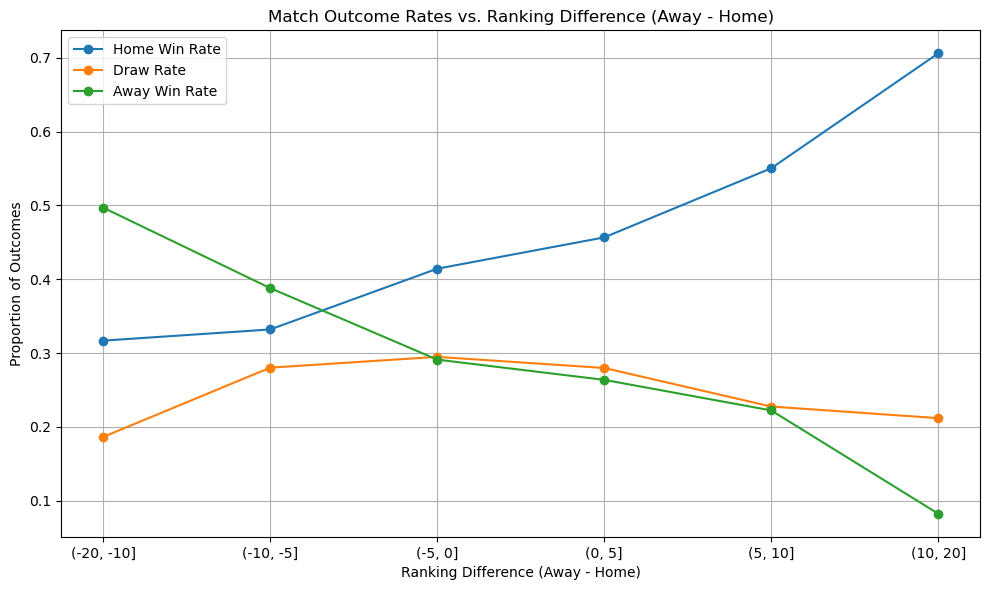

In [78]:
plt.figure(figsize=(10, 6))

plt.plot(bin_stats['ranking_diff_bin'].astype(str), bin_stats['home_win_rate'], label='Home Win Rate', marker='o')
plt.plot(bin_stats['ranking_diff_bin'].astype(str), bin_stats['draw_rate'], label='Draw Rate', marker='o')
plt.plot(bin_stats['ranking_diff_bin'].astype(str), bin_stats['away_win_rate'], label='Away Win Rate', marker='o')

plt.title("Match Outcome Rates vs. Ranking Difference (Away - Home)")
plt.xlabel("Ranking Difference (Away - Home)")
plt.ylabel("Proportion of Outcomes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Research Questions 3

## Does the home team have an advantage over the away team?

In [79]:
total_matches = len(df)

home_wins = df['home_outcome_W'].sum()
draws = df['home_outcome_D'].sum()
away_wins = df['home_outcome_L'].sum()

home_win_rate = home_wins / total_matches
draw_rate = draws / total_matches
away_win_rate = away_wins / total_matches

print("Match Outcome Rates:")
print(f"Home win rate:  {home_win_rate:.2%}")
print(f"Draw rate:      {draw_rate:.2%}")
print(f"Away win rate:  {away_win_rate:.2%}")

if away_win_rate > 0:
    print(f"\nHome win to away win ratio: {home_win_rate / away_win_rate:.2f}")

Match Outcome Rates:
Home win rate:  43.74%
Draw rate:      25.84%
Away win rate:  30.42%

Home win to away win ratio: 1.44


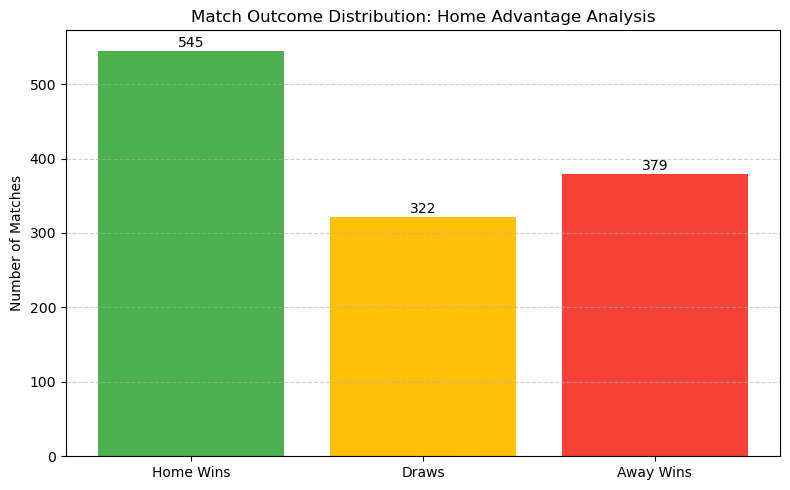

In [80]:
home_wins = df['home_outcome_W'].sum()
draws = df['home_outcome_D'].sum()
away_wins = df['home_outcome_L'].sum()

labels = ['Home Wins', 'Draws', 'Away Wins']
values = [home_wins, draws, away_wins]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['#4CAF50', '#FFC107', '#F44336'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.0f}", ha='center', va='bottom')

plt.title("Match Outcome Distribution: Home Advantage Analysis")
plt.ylabel("Number of Matches")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### conclusion
Our data shows the home team has a clear home advantage over the away team:

# Reasearch question 4: 

## Do teams that won their last game have a higher probability of winning their current game?

In [81]:
home_result_analysis = df.groupby("last_home_result")["home_outcome_W"].mean().reset_index()
home_result_analysis.columns = ["Last Home Result", "Home Win Rate"]

# Apply readable labels
home_result_analysis["Last Home Result"] = home_result_analysis["Last Home Result"].map({
    -1:"Lost Last Game",
     0:"Drew Last Game",
     1:"Won Last Game"
})

print(home_result_analysis)


  Last Home Result  Home Win Rate
0   Lost Last Game       0.410156
1   Drew Last Game       0.458084
2    Won Last Game       0.455000


In [82]:
away_result_analysis = df.groupby("last_away_result")["home_outcome_L"].mean().reset_index()
away_result_analysis.columns = ["Last Away Result", "Away Win Rate"]

# Apply readable labels
away_result_analysis["Last Away Result"] = away_result_analysis["Last Away Result"].map({
    -1: "Lost Last Game",
     0: "Drew Last Game",
     1: "Won Last Game"
})

print(away_result_analysis)


  Last Away Result  Away Win Rate
0   Lost Last Game       0.272076
1   Drew Last Game       0.301887
2    Won Last Game       0.332024


We grouped matches by the outcome of each team's previous game (win, draw/first game, or loss) and calculated the win rate for the current match:

#### Home Teams

| Last Home Result | Home Win Rate |
|------------------|----------------|
| Lost Last Game   | 41.0%          |
| Drew Last Game   | 45.8%          |
| Won Last Game    | 45.5%          |

#### Away Teams

| Last Away Result | Away Win Rate |
|------------------|----------------|
| Lost Last Game   | 27.2%          |
| Drew Last Game   | 30.2%          |
| Won Last Game    | 33.2%          |

---

### Interpretation

- Home teams that lost their previous match had the lowest win rate (41.0%).
- Home teams that drew or won their last match had similar win rates, around 45.5%–45.8%.

- Away teams that lost last time had only a 27.2% win rate.
- Away teams that won last time had the highest win rate at 33.2%.

---

### Conclusion

For home teams, the result of the previous match does not seem to have a strong influence on the current game's outcome. Winning or drawing gives a slightly higher chance than losing, but the difference is marginal.

For away teams, there is a more noticeable pattern. Teams that won their last game are more likely to win again, while those who lost are less likely to win the next match. This suggests that recent performance may have a stronger influence on away teams than home teams.


# Reasearch question 5:

## Can we accurately predict the outcome of a match using our data, and which machine learning model performs best for this task?

#### setup to ensure they use the same feature as they where trained on

In [83]:
def add_engineered_features(df):
    df = df.copy()
    
    if "home_ranking" in df.columns and "away_ranking" in df.columns:
        df["ranking_diff"] = abs(df["home_ranking"] - df["away_ranking"])

    if all(col in df.columns for col in [
        "home_season_wins_so_far", "home_season_losses_so_far",
        "away_season_wins_so_far", "away_season_losses_so_far"
    ]):
        df["form_diff"] = abs(
            (df["home_season_wins_so_far"] - df["home_season_losses_so_far"]) -
            (df["away_season_wins_so_far"] - df["away_season_losses_so_far"])
        )

    if "avg_odd_home_win" in df.columns and "avg_odd_away_win" in df.columns:
        df["odds_ratio"] = df["avg_odd_home_win"] / df["avg_odd_away_win"]

    if all(col in df.columns for col in [
        "avg_odd_home_win", "avg_odd_away_win", "avg_odd_draw"
    ]):
        df["draw_margin"] = df["avg_odd_draw"] - (
            (df["avg_odd_home_win"] + df["avg_odd_away_win"]) / 2
        )

    if "ranking_diff" in df.columns and "form_diff" in df.columns:
        df["is_balanced_match"] = (
            (df["ranking_diff"].abs() <= 2) &
            (df["form_diff"].abs() <= 2)
        ).astype(int)

    return df


In [84]:
df_label = add_engineered_features(pd.read_csv("../data/cleaned-premier-label.csv"))
df_onehot = add_engineered_features(pd.read_csv("../data/cleaned-premier-onehot.csv"))

random forest setup

In [85]:
rf_features = [
    'ranking_diff','avg_odd_home_win','avg_odd_draw','avg_odd_away_win',
    'home_season_wins_so_far','home_season_draws_so_far','home_season_losses_so_far',
    'away_season_wins_so_far','away_season_draws_so_far'
]

X_rf = df_label[rf_features]
y_rf = df_label["home_outcome"]

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size=0.2, random_state=42
)

random forest 2 setup

In [86]:
rf2_features = [
    "avg_odd_home_win", "avg_odd_draw", "avg_odd_away_win",
    "home_ranking", "away_ranking",
    "home_season_wins_so_far", "home_season_draws_so_far", "home_season_losses_so_far",
    "away_season_wins_so_far", "away_season_draws_so_far", "away_season_losses_so_far",
    "form_diff", "ranking_diff", "odds_ratio", "draw_margin"
]

X_rf2 = df_label[rf2_features]
y_rf2 = df_label["home_outcome"]

scaler_rf2 = StandardScaler()
X_rf2_scaled = scaler_rf2.fit_transform(X_rf2)

X_rf2_train, X_rf2_test, y_rf2_train, y_rf2_test = train_test_split(
    X_rf2_scaled, y_rf2, test_size=0.2, stratify=y_rf2, random_state=42
)

logistic regression setup

In [87]:
logreg_features = [
    "avg_odd_home_win", "avg_odd_draw", "home_ranking",
    "home_season_draws_so_far", "home_season_losses_so_far",
    "away_season_wins_so_far", "form_diff", "ranking_diff", "odds_ratio", "is_balanced_match"
]

X_logreg = df_label[logreg_features]
y_logreg = df_label["home_outcome"]

scaler = StandardScaler()
X_logreg_scaled = scaler.fit_transform(X_logreg)

X_logreg_train, X_logreg_test, y_logreg_train, y_logreg_test = train_test_split(
    X_logreg_scaled, y_logreg, test_size=0.2, random_state=42, stratify=y_logreg)

naive bayes setup

In [88]:
nb_features = [
    'home_outcome', 'avg_odd_home_win', 'avg_odd_draw', 'avg_odd_away_win',
    'home_ranking', 'away_ranking',
    'home_season_wins_so_far', 'home_season_draws_so_far', 'home_season_losses_so_far'
]

df_nb = pd.read_csv('../data/cleaned-premier-label.csv')[nb_features]


array = df_nb.values
X_nb = array[:, 1:]
y_nb = array[:, 0]

X_nb_train, X_nb_test, y_nb_train, y_nb_test = train_test_split(
    X_nb, y_nb, test_size=0.2, random_state=7
)

In [89]:
logreg = joblib.load("../Models/logical-reg-model.pkl")
rf = joblib.load("../Models/myrandomforest.pkl")
nb = joblib.load("../Models/naive-bayes-model.pkl")
rf2 = joblib.load("../Models/random-forest2-model.pkl")

c:\Users\pejan\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\pejan\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [90]:
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Loss", "Draw", "Win"]))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [91]:
evaluate_model(rf, "Random Forest (Model 1)", X_rf_test, y_rf_test)
evaluate_model(rf2, "Random Forest (Model 2)", X_rf2_test, y_rf2_test)
evaluate_model(logreg, "Logistic Regression", X_logreg_test, y_logreg_test)
evaluate_model(nb, "Naive Bayes", X_nb_test, y_nb_test)



Random Forest (Model 1) Results:
Accuracy: 0.484
Classification Report:
              precision    recall  f1-score   support

        Loss       0.52      0.47      0.49        89
        Draw       0.34      0.17      0.23        63
         Win       0.50      0.69      0.58        98

    accuracy                           0.48       250
   macro avg       0.45      0.45      0.43       250
weighted avg       0.47      0.48      0.46       250

Confusion Matrix:
[[42 10 37]
 [20 11 32]
 [19 11 68]]

Random Forest (Model 2) Results:
Accuracy: 0.516
Classification Report:
              precision    recall  f1-score   support

        Loss       0.52      0.43      0.47        76
        Draw       0.35      0.20      0.25        65
         Win       0.55      0.76      0.64       109

    accuracy                           0.52       250
   macro avg       0.48      0.47      0.46       250
weighted avg       0.49      0.52      0.49       250

Confusion Matrix:
[[33 14 29]
 [14 13

## Research Question 5

**Can we accurately predict the outcome of a match using our data, and which machine learning model performs best for this task?**

---

## Model Performance Summary


| Model                   | Accuracy | Best at Predicting | Worst at Predicting       |
|------------------------|----------|--------------------|----------------------------|
| **Logistic Regression**   | 0.508    | Wins (Recall: 0.82) | Draws (Recall: 0.05)        |
| **Random Forest (Model 1)** | 0.484    | Wins (Recall: 0.69) | Draws (Recall: 0.17)        |
| **Naive Bayes**            | 0.468    | Wins (Recall: 0.72) | Draws (Recall: 0.07)        |
| **Random Forest (Model 2)**| 0.516 | Wins (Recall: 0.76) | Draws (Recall: 0.20)        |

- All models struggle to predict draws, with extremely low recall and F1-scores across the board.
- All models perform much better at predicting wins, likely due to class imbalance and strong patterns in odds and form-related features.
- Random Forest Model 2 slightly outperforms the others**, but still hovers just above 51% accuracy.


---

### Can we accurately predict match outcomes?

**Not reliably.**  
Despite using odds, rankings, and performance data, models reach only modest accuracy (~48–51%) and perform poorly on draws.

This indicates that match outcomes may be influenced by factors not captured in the data (e.g., injuries, luck, referee decisions, etc.), and that available features alone are insufficient for strong predictive accuracy.

---

### Odds Data Bias

We observed that:

Bookmakers almost never favor the home team, even though home teams win more often.

This has important implications:

- Odds are maybe biased by market behavior rather than match reality.
- This can mislead models into learning patterns shaped by gambler psychology rather than actual game dynamics.
- It may explain why predictions lean heavily toward wins and away from draws or losses.

---

## Final Conclusion

**Can we accurately predict the outcome of a match using our data?**  
**No, not with high reliability.**
While some structure is captured especially for wins, overall performance is limited.   
Models show limited accuracy and struggle especially with draw predictions, indicating that football outcomes are difficult to model with our features.

**Which machine learning model performs best?**  
Logistic Regression performs slightly better in overall accuracy and win recall, but differences are small and all models suffer from the same core issues suggesting that data limitations, not model choice, are the bottleneck.

Random Forest (Model 2) performs slightly better, reaching 51.6% accuracy and improving draw recall to 0.20.  